In [75]:
# loaded all functions using %load from self_dimerization_functions

In [19]:
# %load './self_dimerization_functions/allRxn'
def allRxn(move, bind, self_bind, dissociate):
    import numpy as np
    import random

    options = np.zeros((4, 1))
    options[0] = move/(move + bind + self_bind + dissociate)
    options[1] = (bind + move)/(move + bind + self_bind + dissociate)
    options[2] = (bind + move + self_bind)/(move + bind + self_bind + dissociate)
    options[3] = (bind + move + self_bind + dissociate)/(bind + move + self_bind + dissociate)

    random_value = random.uniform(0, 1)

    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[1] <= random_value < options[2]:
        return 'bind'
    elif options[2] <= random_value < options[3]:
        return 'self_bind'
    else:
        return 'dissociate'


In [20]:
# %load './self_dimerization_functions/boundary_checker'
def boundary_checker(x, spaceMin, spaceMax):
    if spaceMax in x or spaceMin in x:
        x = list(x)
        if x[0] == spaceMin:
            x[0] = spaceMin + 1
        elif x[0] == spaceMax:
            x[0] = spaceMax - 1
        elif x[1] == spaceMin:
            x[1] = spaceMin + 1
        elif x[1] == spaceMax:
            x[1] = spaceMax - 1
    return tuple(x)


In [21]:
# %load './self_dimerization_functions/edge_selector'
def edge_selector(neighbor_tracking):
    checker = 'NaN'
    while checker == 'NaN':
        val = random.choice(neighbor_tracking.keys())
        checker = neighbor_tracking[val]
    return val


In [22]:
# %load './self_dimerization_functions/illegal_boundaries'
def illegal_boundaries(spaceMax):
    mydict = {}
    j = 1
    for i in range(spaceMax):
        mydict[ (0, i) ] = j
        j += 1
        mydict[ (i, 0) ] = j
        j += 1
        mydict[ (i+1, 0)] =j
        j += 1
        mydict[ (i, 0)] =j
        j += 1
        mydict[ (-1, i+1) ] = j
        j += 1
        mydict[ (-1, i) ] = j
        j += 1

    mydict[ (spaceMax-1, spaceMax-1) ] = 0


    return mydict


In [23]:
# %load './self_dimerization_functions/illegal_position_generator'
def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue

    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}

    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })

    return moves, illegal_moves


In [24]:
# %load './self_dimerization_functions/layout_gen'
def layout_gen(node_number, legal_moves):
    import random

    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)

   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}

    return layout_old


In [25]:
# %load './self_dimerization_functions/movement_finder'
def movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax):
    from operator import add

    total_moves = 4
    my_possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1) }

    finding_neighbors = {}
    j = 0
    for i in my_possibilities.values():
        finding_neighbors[tuple(map(add, position_selected, i))] = j
        j += 1


    if position_selected[0] == spaceMin and position_selected[1] == spaceMin:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax and position_selected[1] == spaceMax:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMin or position_selected[1] == spaceMin:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax or position_selected[1] == spaceMax:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    else:
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        #sd3 = set(illegal_moves.keys())
        current_moves = total_moves - len(sd1.intersection(sd2)) #- len(sd1.intersection(sd3))
        return current_moves


In [26]:
# %load './self_dimerization_functions/Mover'
def Mover(position_selected, layout_old, illegal_moves):
    import random
    from operator import add

    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4

    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))

    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)

    if new_position_selected == position_selected:

        if new_posit not in layout_old:
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected


In [27]:
# %load './self_dimerization_functions/new_association_function2'
def new_association_function2(x, d, g, new_dict, val):
    import numpy as np
    new_list = []
    posit = np.array([[1,0], [0,1], [-1, 0], [0,-1] ])

    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    if x in new_dict and val == True:
        options = new_dict[x]
        toBind = random.choice(options)

        # exit out of set in loop of these conditions are not met

        if str(toBind) in g.vs['name']:
            v1_position = g.vs['name'].index( str(toBind) )
        else:
            v1_position = g.vs['name'].index( toBind )
        if str(x) in g.vs['name']:
            v2_position = g.vs['name'].index( str(x) )
        else:
            v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 1 and g.degree(v2_position) < 1:
            g.add_edge(v1_position, v2_position)
        return new_dict[x]
    elif x in new_dict and val == False:
        return new_dict[x]
    else:
        new_dict[x] = 'NaN'
        return new_dict[x]


# Initiate Gillespie

In [43]:
from igraph import *
from operator import add
import numpy

spaceMax = 20
spaceMin = 0
node_number = 2
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)
layout_old = layout_gen(node_number, legal_moves)

# initiate movement count
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val
    
# initiate neighbor tracking

import collections
g = Graph(len(layout_old))

output = {}
i = 0
for k,v in layout_old.items():
    output[str(k)] = i
#    output[k] = i
    i += 1    
od = collections.OrderedDict(sorted(output.items()))
g.vs['name'] = od.keys()


neighbor_tracking = {}

for k,v in layout_old.items():
    new_association_function2(k, layout_old, g, neighbor_tracking, False)
    

# initiate neighbor edge count
bind_count = {}
for k,v in neighbor_tracking.items():
    bind_count[k] = len(v)

# initiate self binding
self_bind_count = {}
for k, v in layout_old.items():
    self_bind_count[k] = v


In [39]:
new_association_function2(k, layout_old, g, neighbor_tracking, False)

'NaN'

In [40]:
layout_old

{(8, 19): 217, (17, 18): 414}

# Run Gillespie

In [44]:
import numpy as np
import random

graph_stored = []
graph_move = []
graph_self_bind = []
t = 0
total_time = 10000
k_move = 1e-3
k_bind = 1e-3
k_off = 1e-2
len_factor = 1
tau = 1e-3
times = []
degree_dist = {}
degree_dist_all = {}
binding_result = []

summarized_results = np.zeros(shape=(total_time+1,2))
self_binding_count = 0

rxn_dist = {}
#result = np.zeros(shape=(total_time,2))
result = {}
output = []
# this sets up initial movement options
#for k,v in layout_old.items():
#    movement_positions[v] = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
        
while t <= total_time:


    ## Calculate all possible reactions

    move = sum(move_count.values() )                              # movement
    move_k = move * k_move * tau

    bind = sum(bind_count.values() )                              # binding
    bind_k = bind * k_bind * tau
    
    ################################
    # self binding
    ################################
    
    # get the length of layout_old (total possible 
    #self binding and correct for already bound nodes 
    #(either self or non-self bound))
    self_bind = len(layout_old) - len(g.get_edgelist())*2
    self_bind_k = self_bind * k_bind * tau * len_factor      

  
    ################################
    # dissociate
    ################################


    dissociate = len(g.get_edgelist())                            # dissociation
    dissociate_k = dissociate * k_off * tau
    
    # dissociation
    ##dissociate = len(g.get_edgelist())                           
    ##dissociate_k = dissociate * k_off * tau
    
    # Time at which the next reaction will take place
    rate_sum = move_k + bind_k + self_bind_k + dissociate_k                   
    total_tau = random.expovariate(lambd=rate_sum)                

    if not times:
        times.append(total_tau)
    else:
        total_tau = total_tau
        times.append(total_tau)                                             # Save time as a tuple
        
    reaction = allRxn(move_k, bind_k, self_bind_k, dissociate_k)            # Sample from uniform distribution to select next rxn

    rxn_dist[i] = reaction # store distribution of Rxn's

    reaction = 'move'
    if reaction == 'move':
        print 'move'
        # randomly select a node to move
        position_selected = random.choice(layout_old.keys() )                  
                
        if position_selected in layout_old:
            move_count.pop(position_selected)
            neighbor_tracking.pop(position_selected)
        
        # if position_selected is of degree 0, then move it normally using Mover function
            layout_old, pos = Mover(position_selected, layout_old, illegal_moves)       
        
        # update the count of moves the selected object can perform still
            move_count[pos] = movement_finder(pos, illegal_moves, layout_old, spaceMin, spaceMax)
            
            resultxx = new_association_function2(pos, layout_old, g, neighbor_tracking, False)
            if resultxx == 'NaN':
                pass
            else:
                result[t] = times[t]

        
        #print position_selected
            
    if reaction == 'bind':
        #print 'bind'
        position_selected = edge_selector(neighbor_tracking)                  # select a node with neighbors randomly for forming an edge
        
        if position_selected in layout_old:
            move_count.pop(position_selected)
            neighbor_tracking.pop(position_selected)
        
            # bind & update move_count and neighbor_tracking dict
            move_count[position_selected] = movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)
            
            new_association_function3(position_selected, layout_old, g, neighbor_tracking, True)
            
        
            #g.simplify(g)                                                        # simplify the graph  

        print 'bind', position_selected
        print g

    if reaction == 'self_bind':

        if position_selected in layout_old:
            #move_count.pop(position_selected)
            #neighbor_tracking.pop(position_selected)

            # bind & update move_count and neighbor_tracking dict
            self_binding_count = self_associate(position_selected, layout_old, g, neighbor_tracking)
        
        print 'self_bind'
        print g

    if reaction == 'dissociate':

        edge_list = g.get_edgelist()

        try:
            edge_selected = random.choice(edge_list)
            g.delete_edges(edge_selected)
            print 'dissociate'
        except:
            pass
            
        
    # store graph at each interval
    graph_stored.append(g)               
    graph_move.append(move)
    graph_self_bind.append(self_binding_count)
    
    
    for i in range(len(g.get_edgelist() ) ):
        # store tuple in online fashion
        to_check = g.get_edgelist()[i]
        # count the number of times this index repeats. 
        # If it is once, then it is a higer level binder. If it is two it is a self binder
        binding_result.append( to_check.count(to_check[0]) )
    
    
    ctr = collections.Counter(binding_result)
    try:
        summarized_results[t] = ctr.values()
    except:
        pass
    
    output.append(result.values())
    t += 1
    print t



move
1
move
2
move
3
move
4
move
5
move
6
move
7
move
8
move
9
move
10
move
11
move
12
move
13
move
14
move
15
move
16
move
17
move
18
move
19
move
20
move
21
move
22
move
23
move
24
move
25
move
26
move
27
move
28
move
29
move
30
move
31
move
32
move
33
move
34
move
35
move
36
move
37
move
38
move
39
move
40
move
41
move
42
move
43
move
44
move
45
move
46
move
47
move
48
move
49
move
50
move
51
move
52
move
53
move
54
move
55
move
56
move
57
move
58
move
59
move
60
move
61
move
62
move
63
move
64
move
65
move
66
move
67
move
68
move
69
move
70
move
71
move
72
move
73
move
74
move
75
move
76
move
77
move
78
move
79
move
80
move
81
move
82
move
83
move
84
move
85
move
86
move
87
move
88
move
89
move
90
move
91
move
92
move
93
move
94
move
95
move
96
move
97
move
98
move
99
move
100
move
101
move
102
move
103
move
104
move
105
move
106
move
107
move
108
move
109
move
110
move
111
move
112
move
113
move
114
move
115
move
116
move
117
move
118
move
119
move
120
move
121
move
122
move
123
m

1162
move
1163
move
1164
move
1165
move
1166
move
1167
move
1168
move
1169
move
1170
move
1171
move
1172
move
1173
move
1174
move
1175
move
1176
move
1177
move
1178
move
1179
move
1180
move
1181
move
1182
move
1183
move
1184
move
1185
move
1186
move
1187
move
1188
move
1189
move
1190
move
1191
move
1192
move
1193
move
1194
move
1195
move
1196
move
1197
move
1198
move
1199
move
1200
move
1201
move
1202
move
1203
move
1204
move
1205
move
1206
move
1207
move
1208
move
1209
move
1210
move
1211
move
1212
move
1213
move
1214
move
1215
move
1216
move
1217
move
1218
move
1219
move
1220
move
1221
move
1222
move
1223
move
1224
move
1225
move
1226
move
1227
move
1228
move
1229
move
1230
move
1231
move
1232
move
1233
move
1234
move
1235
move
1236
move
1237
move
1238
move
1239
move
1240
move
1241
move
1242
move
1243
move
1244
move
1245
move
1246
move
1247
move
1248
move
1249
move
1250
move
1251
move
1252
move
1253
move
1254
move
1255
move
1256
move
1257
move
1258
move
1259
move
1260
move
1261
move


2023
move
2024
move
2025
move
2026
move
2027
move
2028
move
2029
move
2030
move
2031
move
2032
move
2033
move
2034
move
2035
move
2036
move
2037
move
2038
move
2039
move
2040
move
2041
move
2042
move
2043
move
2044
move
2045
move
2046
move
2047
move
2048
move
2049
move
2050
move
2051
move
2052
move
2053
move
2054
move
2055
move
2056
move
2057
move
2058
move
2059
move
2060
move
2061
move
2062
move
2063
move
2064
move
2065
move
2066
move
2067
move
2068
move
2069
move
2070
move
2071
move
2072
move
2073
move
2074
move
2075
move
2076
move
2077
move
2078
move
2079
move
2080
move
2081
move
2082
move
2083
move
2084
move
2085
move
2086
move
2087
move
2088
move
2089
move
2090
move
2091
move
2092
move
2093
move
2094
move
2095
move
2096
move
2097
move
2098
move
2099
move
2100
move
2101
move
2102
move
2103
move
2104
move
2105
move
2106
move
2107
move
2108
move
2109
move
2110
move
2111
move
2112
move
2113
move
2114
move
2115
move
2116
move
2117
move
2118
move
2119
move
2120
move
2121
move
2122
move


2931
move
2932
move
2933
move
2934
move
2935
move
2936
move
2937
move
2938
move
2939
move
2940
move
2941
move
2942
move
2943
move
2944
move
2945
move
2946
move
2947
move
2948
move
2949
move
2950
move
2951
move
2952
move
2953
move
2954
move
2955
move
2956
move
2957
move
2958
move
2959
move
2960
move
2961
move
2962
move
2963
move
2964
move
2965
move
2966
move
2967
move
2968
move
2969
move
2970
move
2971
move
2972
move
2973
move
2974
move
2975
move
2976
move
2977
move
2978
move
2979
move
2980
move
2981
move
2982
move
2983
move
2984
move
2985
move
2986
move
2987
move
2988
move
2989
move
2990
move
2991
move
2992
move
2993
move
2994
move
2995
move
2996
move
2997
move
2998
move
2999
move
3000
move
3001
move
3002
move
3003
move
3004
move
3005
move
3006
move
3007
move
3008
move
3009
move
3010
move
3011
move
3012
move
3013
move
3014
move
3015
move
3016
move
3017
move
3018
move
3019
move
3020
move
3021
move
3022
move
3023
move
3024
move
3025
move
3026
move
3027
move
3028
move
3029
move
3030
move


move
3875
move
3876
move
3877
move
3878
move
3879
move
3880
move
3881
move
3882
move
3883
move
3884
move
3885
move
3886
move
3887
move
3888
move
3889
move
3890
move
3891
move
3892
move
3893
move
3894
move
3895
move
3896
move
3897
move
3898
move
3899
move
3900
move
3901
move
3902
move
3903
move
3904
move
3905
move
3906
move
3907
move
3908
move
3909
move
3910
move
3911
move
3912
move
3913
move
3914
move
3915
move
3916
move
3917
move
3918
move
3919
move
3920
move
3921
move
3922
move
3923
move
3924
move
3925
move
3926
move
3927
move
3928
move
3929
move
3930
move
3931
move
3932
move
3933
move
3934
move
3935
move
3936
move
3937
move
3938
move
3939
move
3940
move
3941
move
3942
move
3943
move
3944
move
3945
move
3946
move
3947
move
3948
move
3949
move
3950
move
3951
move
3952
move
3953
move
3954
move
3955
move
3956
move
3957
move
3958
move
3959
move
3960
move
3961
move
3962
move
3963
move
3964
move
3965
move
3966
move
3967
move
3968
move
3969
move
3970
move
3971
move
3972
move
3973
move
3974


move
4942
move
4943
move
4944
move
4945
move
4946
move
4947
move
4948
move
4949
move
4950
move
4951
move
4952
move
4953
move
4954
move
4955
move
4956
move
4957
move
4958
move
4959
move
4960
move
4961
move
4962
move
4963
move
4964
move
4965
move
4966
move
4967
move
4968
move
4969
move
4970
move
4971
move
4972
move
4973
move
4974
move
4975
move
4976
move
4977
move
4978
move
4979
move
4980
move
4981
move
4982
move
4983
move
4984
move
4985
move
4986
move
4987
move
4988
move
4989
move
4990
move
4991
move
4992
move
4993
move
4994
move
4995
move
4996
move
4997
move
4998
move
4999
move
5000
move
5001
move
5002
move
5003
move
5004
move
5005
move
5006
move
5007
move
5008
move
5009
move
5010
move
5011
move
5012
move
5013
move
5014
move
5015
move
5016
move
5017
move
5018
move
5019
move
5020
move
5021
move
5022
move
5023
move
5024
move
5025
move
5026
move
5027
move
5028
move
5029
move
5030
move
5031
move
5032
move
5033
move
5034
move
5035
move
5036
move
5037
move
5038
move
5039
move
5040
move
5041


6037
move
6038
move
6039
move
6040
move
6041
move
6042
move
6043
move
6044
move
6045
move
6046
move
6047
move
6048
move
6049
move
6050
move
6051
move
6052
move
6053
move
6054
move
6055
move
6056
move
6057
move
6058
move
6059
move
6060
move
6061
move
6062
move
6063
move
6064
move
6065
move
6066
move
6067
move
6068
move
6069
move
6070
move
6071
move
6072
move
6073
move
6074
move
6075
move
6076
move
6077
move
6078
move
6079
move
6080
move
6081
move
6082
move
6083
move
6084
move
6085
move
6086
move
6087
move
6088
move
6089
move
6090
move
6091
move
6092
move
6093
move
6094
move
6095
move
6096
move
6097
move
6098
move
6099
move
6100
move
6101
move
6102
move
6103
move
6104
move
6105
move
6106
move
6107
move
6108
move
6109
move
6110
move
6111
move
6112
move
6113
move
6114
move
6115
move
6116
move
6117
move
6118
move
6119
move
6120
move
6121
move
6122
move
6123
move
6124
move
6125
move
6126
move
6127
move
6128
move
6129
move
6130
move
6131
move
6132
move
6133
move
6134
move
6135
move
6136
move


7110
move
7111
move
7112
move
7113
move
7114
move
7115
move
7116
move
7117
move
7118
move
7119
move
7120
move
7121
move
7122
move
7123
move
7124
move
7125
move
7126
move
7127
move
7128
move
7129
move
7130
move
7131
move
7132
move
7133
move
7134
move
7135
move
7136
move
7137
move
7138
move
7139
move
7140
move
7141
move
7142
move
7143
move
7144
move
7145
move
7146
move
7147
move
7148
move
7149
move
7150
move
7151
move
7152
move
7153
move
7154
move
7155
move
7156
move
7157
move
7158
move
7159
move
7160
move
7161
move
7162
move
7163
move
7164
move
7165
move
7166
move
7167
move
7168
move
7169
move
7170
move
7171
move
7172
move
7173
move
7174
move
7175
move
7176
move
7177
move
7178
move
7179
move
7180
move
7181
move
7182
move
7183
move
7184
move
7185
move
7186
move
7187
move
7188
move
7189
move
7190
move
7191
move
7192
move
7193
move
7194
move
7195
move
7196
move
7197
move
7198
move
7199
move
7200
move
7201
move
7202
move
7203
move
7204
move
7205
move
7206
move
7207
move
7208
move
7209
move


move
8245
move
8246
move
8247
move
8248
move
8249
move
8250
move
8251
move
8252
move
8253
move
8254
move
8255
move
8256
move
8257
move
8258
move
8259
move
8260
move
8261
move
8262
move
8263
move
8264
move
8265
move
8266
move
8267
move
8268
move
8269
move
8270
move
8271
move
8272
move
8273
move
8274
move
8275
move
8276
move
8277
move
8278
move
8279
move
8280
move
8281
move
8282
move
8283
move
8284
move
8285
move
8286
move
8287
move
8288
move
8289
move
8290
move
8291
move
8292
move
8293
move
8294
move
8295
move
8296
move
8297
move
8298
move
8299
move
8300
move
8301
move
8302
move
8303
move
8304
move
8305
move
8306
move
8307
move
8308
move
8309
move
8310
move
8311
move
8312
move
8313
move
8314
move
8315
move
8316
move
8317
move
8318
move
8319
move
8320
move
8321
move
8322
move
8323
move
8324
move
8325
move
8326
move
8327
move
8328
move
8329
move
8330
move
8331
move
8332
move
8333
move
8334
move
8335
move
8336
move
8337
move
8338
move
8339
move
8340
move
8341
move
8342
move
8343
move
8344


move
9318
move
9319
move
9320
move
9321
move
9322
move
9323
move
9324
move
9325
move
9326
move
9327
move
9328
move
9329
move
9330
move
9331
move
9332
move
9333
move
9334
move
9335
move
9336
move
9337
move
9338
move
9339
move
9340
move
9341
move
9342
move
9343
move
9344
move
9345
move
9346
move
9347
move
9348
move
9349
move
9350
move
9351
move
9352
move
9353
move
9354
move
9355
move
9356
move
9357
move
9358
move
9359
move
9360
move
9361
move
9362
move
9363
move
9364
move
9365
move
9366
move
9367
move
9368
move
9369
move
9370
move
9371
move
9372
move
9373
move
9374
move
9375
move
9376
move
9377
move
9378
move
9379
move
9380
move
9381
move
9382
move
9383
move
9384
move
9385
move
9386
move
9387
move
9388
move
9389
move
9390
move
9391
move
9392
move
9393
move
9394
move
9395
move
9396
move
9397
move
9398
move
9399
move
9400
move
9401
move
9402
move
9403
move
9404
move
9405
move
9406
move
9407
move
9408
move
9409
move
9410
move
9411
move
9412
move
9413
move
9414
move
9415
move
9416
move
9417


In [125]:
for key, val in result.iteritems():
    result[key] = int(val)

In [32]:
import scipy
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['norm','lognorm','expon']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))

        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted')
        plt.hist(y, alpha=0.5, label='Actual')
        plt.legend(loc='upper right')

In [33]:
# test for normal distribution

0.6239650851343078

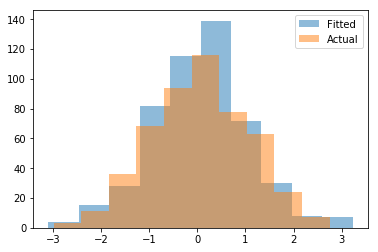

In [46]:
from scipy.stats import norm
r = norm.rvs(size=500)   #normal


dst = Distribution()
dst.Fit(r)
dst.Plot(r)
dst.PValue

In [ ]:
# The wait times are exponentially distributed

expon
0.7939213925620334


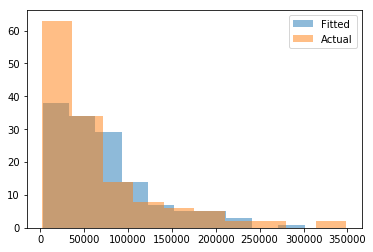

In [45]:
from scipy.stats import expon
r = result.values()

dst = Distribution()
dst.Fit(r)
dst.Plot(r)
print dst.DistributionName
print dst.PValue